In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmcrameri import cm

import os
from pathlib import Path
import shutil
import gzip
import re

import timeit


In [103]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

In [104]:
single_binary = InitialBinaryTable.InitialBinaries(m1=85.543645, m2=84.99784, porb=446.795757, ecc=0.448872, tphysf=13700.0, kstar1=1, kstar2=1, metallicity=0.002)

print(single_binary)

   kstar_1  kstar_2     mass_1    mass_2  ...  bhspin_1  bhspin_2  tphys  binfrac
0      1.0      1.0  85.543645  84.99784  ...       0.0       0.0    0.0      1.0

[1 rows x 38 columns]


In [105]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [106]:
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

In [107]:
print(bpp.columns)

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num'],
      dtype='object')


In [108]:
print(bcm.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


In [109]:
bpp = bpp[['mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'evol_type']]


In [110]:
from cosmic.plotting import evolve_and_plot
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)
single_binary = InitialBinaryTable.InitialBinaries(m1=1.1, m2=0.001, porb=1000000, ecc=0.448872, tphysf=5669, kstar1=1, kstar2=1, metallicity=0.002)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})


In [111]:
bpp = bpp[['tphys', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)


          tphys    massc_1        rad_1  kstar_1    radc_1  evol_type
0      0.000000   0.000000    11.060285      1.0  0.000000        1.0
0      3.717075  31.385116    36.024109      2.0  1.880953        2.0
0      3.718373  31.662559   335.345512      2.0  1.890997        3.0
0      3.720012  32.012737  5626.023278      4.0  1.903624        2.0
0      3.740038  32.176152   172.422728      4.0  1.916349        4.0
0      3.741215   0.000000     1.916751      7.0  0.000000        2.0
0      4.071374   0.000000     1.658195      7.0  0.000000       15.0
0      4.071374  24.988585     0.000106     14.0  0.000106        2.0
0      4.894369  24.988590     0.000106     14.0  0.000106        2.0
0      4.895887  24.989628     0.000106     14.0  0.000106        3.0
0      4.896841  24.990676     0.000106     14.0  0.000106        2.0
0      4.896841  24.990676     0.000106     14.0  0.000106        7.0
0      4.896841  24.990676     0.000106     14.0  0.000106        8.0
0      4.896841  24.

/Users/wyang10/anaconda3/envs/cassi/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


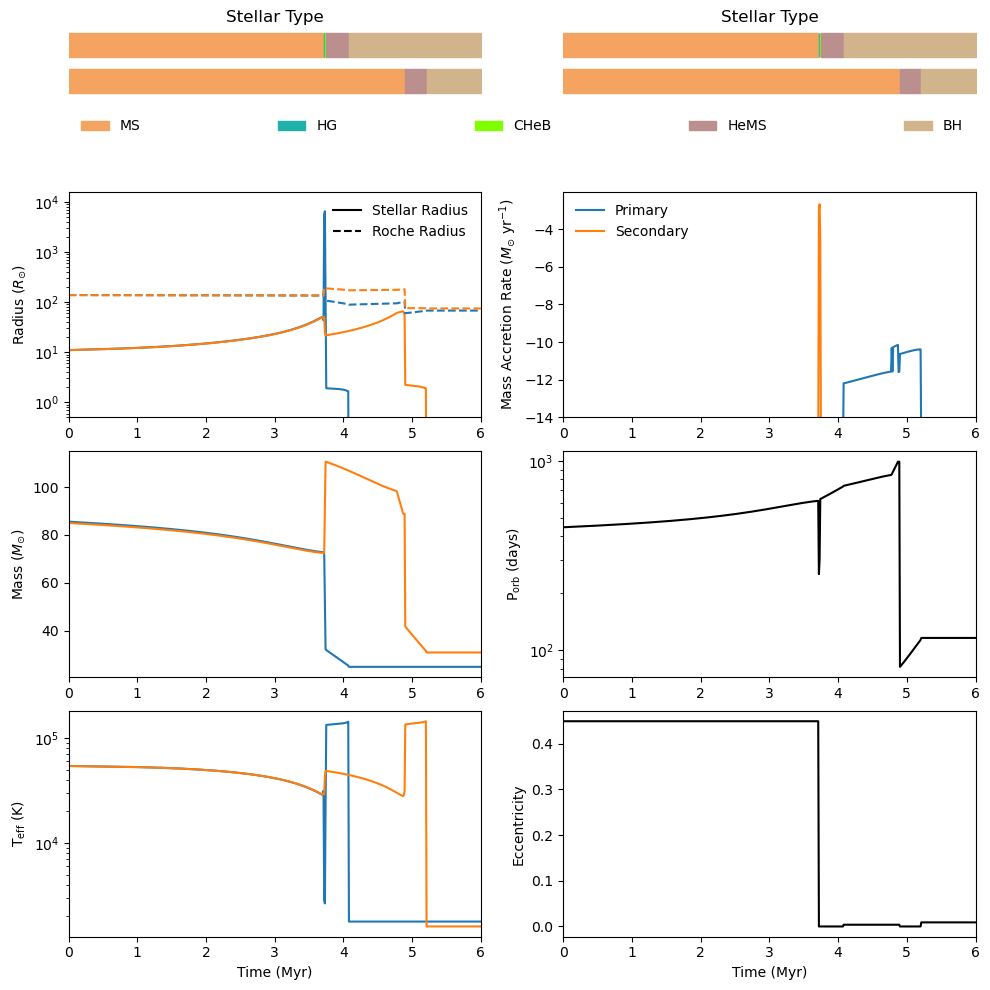

In [112]:
fig = evolve_and_plot(initC, t_min=None, t_max=6.0, BSEDict={}, sys_obs={})


In [113]:
data_path = 'data/updated_simulation_data'
output_file_all_all = 'processed_data/collisions_all_data.csv'
output_file_all = 'processed_data/allcollisions_GiantBH_data.csv'
output_file_nocollision = 'processed_data/nocollision_GiantBH_data.csv'
output_file_iscollision = 'processed_data/iscollision_GiantBH_data.csv'
#header = "#N,#rv,#rg,#z,#t_snapshot[myr],#M1[MSUN],#M2[MSUN],#k1,#k2,#id1,#id2,#sma[AU],#ecc,#bin_star_radius0[RSUN],#bin_star_radius1[RSUN],#snapshot, #roche_lobe1_calc[RSUN], #roche_lobe2_calc[RSUN],#radrol0,#radrol1"


43
111
22
4


/var/folders/3g/s_5y07nx3m9_wy_5wbtgxlt40000gr/T/ipykernel_43020/1288430980.py:96: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


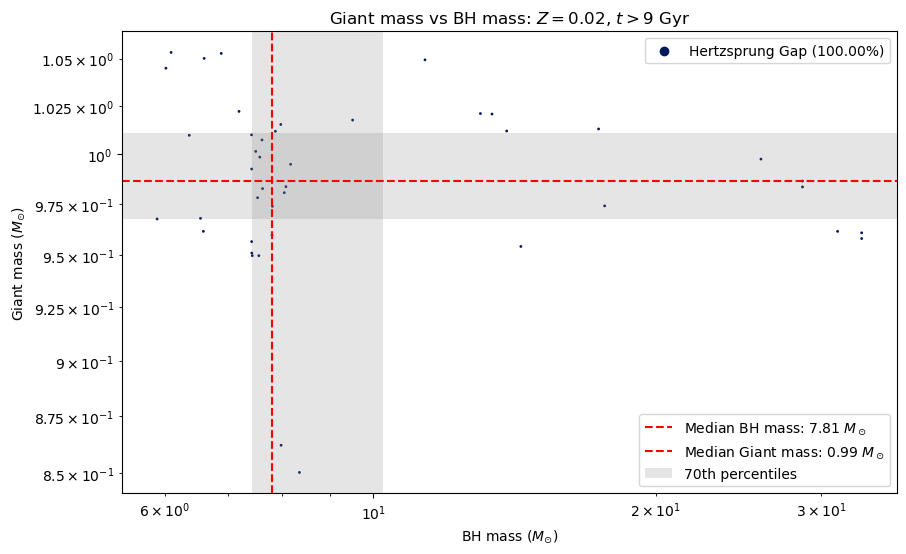

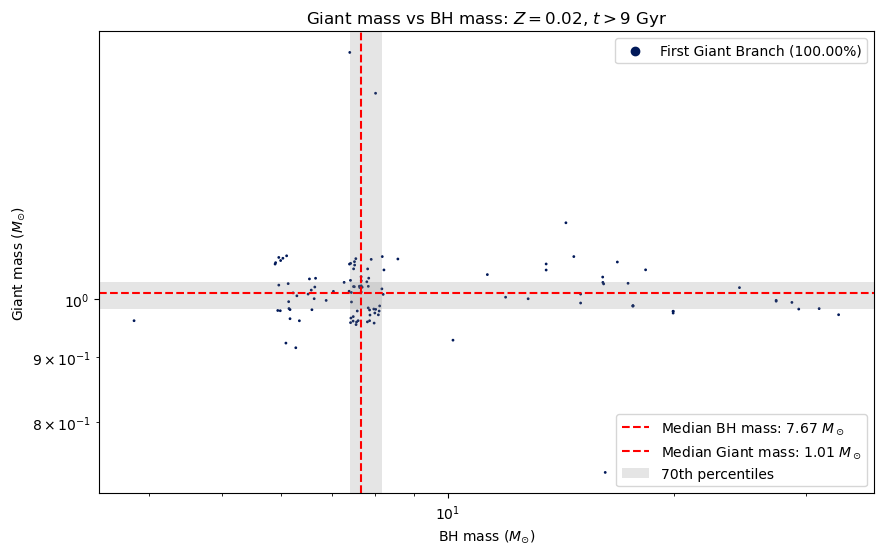

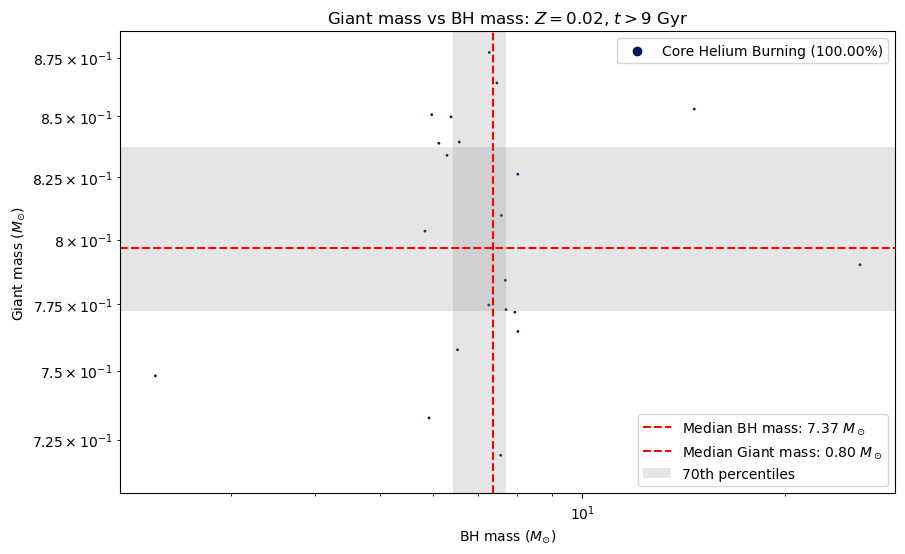

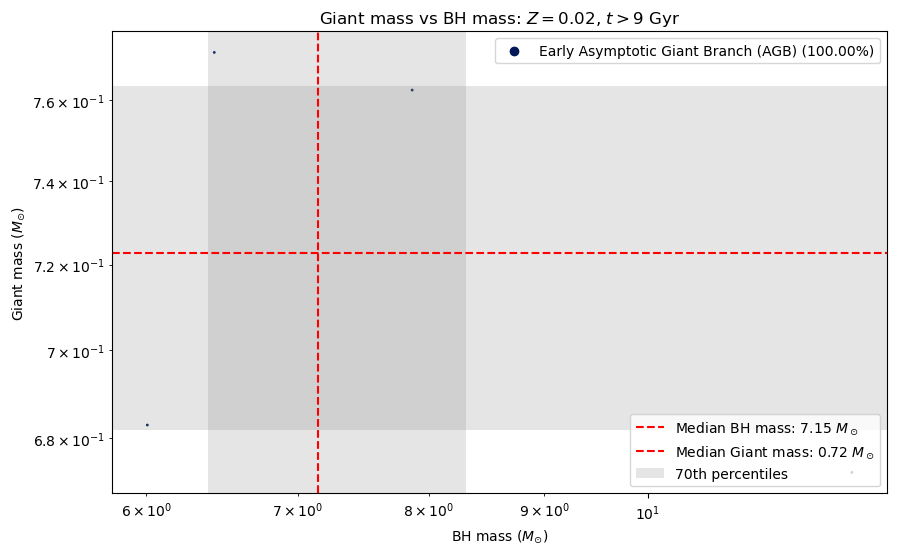

In [114]:
median_giant_masses = []
median_giant_tcolls = []

# Load the CSV file into a numpy array
data = np.loadtxt(output_file_nocollision, delimiter=',', dtype=str, skiprows=1)
for i in range(2,6):
        
    # Check k
    check_k = np.array(data[:, 19], dtype=float) == float(i)
    data_k = data[check_k]

    # Check z
    check_z = np.array(data_k[:, 3], dtype=float) == 0.02
    data_z = data_k[check_z]

    # Check age
    check_old = np.array(data_z[:, 4], dtype=float) > 9e3
    data_old = data_z[check_old]

    mass_BH = data_old[::, 9].astype(float)
    mass_Giant = data_old[::, 11].astype(float)
    type_Giant = data_old[::, 19].astype(float)
    times_GiantBH = data_old[::, 4].astype(float)
    print(len(mass_Giant))

    colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))

    # Get unique numbers from the list
    unique_numbers = list(set(type_Giant))
    unique_numbers.sort()

    # Create a mapping of unique numbers to colors
    N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
    colors_N = [N_to_color[N] for N in type_Giant]

    # Get percentages for each type
    fractions = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers]

    fig, ax = plt.subplots(figsize=(10, 6))

    scatter = ax.scatter(mass_BH, mass_Giant, s=1, color=colors_N)

    median_BH = np.median(mass_BH)
    median_Giant = np.median(mass_Giant)
    median_Giant_index = np.argsort(mass_Giant)[len(mass_Giant)//2]

    time_GiantBH_median = times_GiantBH[median_Giant_index]


    median_BH_line = ax.axvline(median_BH, color='red', linestyle='--', label=rf'Median BH mass: {median_BH:.2f} $M_\odot$')
    median_Giant_line = ax.axhline(median_Giant, color='red', linestyle='--', label=rf'Median Giant mass: {median_Giant:.2f} $M_\odot$')

    mass_Giant_30 = np.percentile(mass_Giant, 30)
    mass_Giant_70 = np.percentile(mass_Giant, 70)
    mass_BH_30 = np.percentile(mass_BH, 30)
    mass_BH_70 = np.percentile(mass_BH, 70)

    percentiles = ax.axhspan(mass_Giant_30, mass_Giant_70, color='gray', alpha=0.2, lw=0, label="70th percentiles")
    ax.axvspan(mass_BH_30, mass_BH_70, color='gray', alpha=0.2, lw=0)

    ax.set_xlabel(r'BH mass ($M_{\odot}$)')
    ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
    ax.set_title('Giant mass vs BH mass: $Z=0.02$, $t>9$ Gyr')
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Define the dictionary for the mapping
    stage_mapping = {
        0: "Main Sequence (MS), $< 0.7 M_\odot$",
        1: "MS, $> 0.7 M_\odot$",
        2: "Hertzsprung Gap",
        3: "First Giant Branch",
        4: "Core Helium Burning",
        5: "Early Asymptotic Giant Branch (AGB)",
        6: "Thermally Pulsing AGB",
        7: "Naked Helium Star MS",
        8: "Naked Helium Star Hertzsprung Gap",
        9: "Naked Helium Star Giant Branch",
        10: "Helium White Dwarf",
        11: "Carbon/Oxygen White Dwarf",
        12: "Oxygen/Neon White Dwarf",
        13: "Neutron Star",
        14: "Black Hole",
        15: "Massless Remnant"
    }

    # Replace integers with corresponding text
    giant_name_types = [stage_mapping[num] for num in unique_numbers]

    # Create a legend
    legend_labels = {stage_mapping[N]: f'{stage_mapping[N]} ({frac:.2f}%)' for N, frac in zip(unique_numbers, fractions)}
    legend_handles = []
    for N in unique_numbers:
        label = legend_labels[stage_mapping[N]]
        color = N_to_color[N]
        legend_handles.append(ax.scatter([], [], c=color, label=label))
    first_legend = ax.legend(handles=legend_handles, loc='best')
    ax.add_artist(first_legend)  # Add the first legend as an artist to the axes

    # Create the second legend for the median lines
    median_legend = ax.legend(handles=[median_BH_line, median_Giant_line, percentiles], loc='lower right')
    
    median_giant_tcolls.append(time_GiantBH_median)
    median_giant_masses.append(median_Giant)


In [115]:
print(median_giant_masses)
print(median_giant_tcolls)

[0.986418, 1.01138, 0.7967625, 0.7227950000000001]
[12002.85302, 11466.37101, 10605.88065, 10655.25917]


In [128]:
for mass, tcoll in zip(median_giant_masses, median_giant_tcolls):
    
    single_binary = InitialBinaryTable.InitialBinaries(m1=float(mass), m2=0.0001, porb=10000000, ecc=0, tphysf=float(tcoll), kstar1=1, kstar2=1, metallicity=0.02)

    BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

    #fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

    bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
    print(bpp)


         tphys    mass_1  massc_1     rad_1  kstar_1  radc_1  evol_type
0      0.00000  0.986418      0.0  0.870536      1.0     0.0        1.0
0  12002.85302  0.986418      0.0  1.365991      1.0     0.0       10.0
         tphys   mass_1  massc_1     rad_1  kstar_1  radc_1  evol_type
0      0.00000  1.01138      0.0  0.894341      1.0     0.0        1.0
0  11466.37101  1.01138      0.0  1.587154      1.0     0.0       10.0
         tphys    mass_1  massc_1     rad_1  kstar_1  radc_1  evol_type
0      0.00000  0.796763      0.0  0.729517      1.0     0.0        1.0
0  10605.88065  0.796763      0.0  0.778395      1.0     0.0       10.0
         tphys    mass_1  massc_1     rad_1  kstar_1  radc_1  evol_type
0      0.00000  0.722795      0.0  0.672297      0.0     0.0        1.0
0  10655.25917  0.722795      0.0  0.704207      0.0     0.0       10.0


In [150]:

single_binary = InitialBinaryTable.InitialBinaries(m1=0.98674582, m2=0.0001, porb=10000000, ecc=0, tphysf=12002.85302, kstar1=1, kstar2=1, metallicity=0.02)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)

         tphys    mass_1  massc_1     rad_1  kstar_1  radc_1  evol_type
0      0.00000  0.986746      0.0  0.870836      1.0     0.0        1.0
0  12002.85302  0.986746      0.0  1.369481      1.0     0.0       10.0


In [147]:

single_binary = InitialBinaryTable.InitialBinaries(m1=1.0180994, m2=0.0001, porb=10000000, ecc=0, tphysf=11466.37101, kstar1=1, kstar2=1, metallicity=0.02)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)

         tphys    mass_1   massc_1     rad_1  kstar_1    radc_1  evol_type
0      0.00000  1.018099  0.000000  0.901087      1.0  0.000000        1.0
0  11360.26642  1.018099  0.109453  1.699218      2.0  0.133539        2.0
0  11466.37101  1.018025  0.115740  1.827599      2.0  0.130907       10.0


In [151]:

single_binary = InitialBinaryTable.InitialBinaries(m1=1.0444265, m2=0.0001, porb=10000000, ecc=0, tphysf=10605.88065, kstar1=1, kstar2=1, metallicity=0.02)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)

          tphys    mass_1   massc_1     rad_1  kstar_1    radc_1  evol_type
0      0.000000  1.044426  0.000000  0.928950      1.0  0.000000        1.0
0  10299.689722  1.044426  0.111843  1.743032      2.0  0.132516        2.0
0  10605.880650  1.044167  0.131222  2.193855      2.0  0.125130       10.0


In [152]:

single_binary = InitialBinaryTable.InitialBinaries(m1=1.0440494, m2=0.0001, porb=10000000, ecc=0, tphysf=10655.25917, kstar1=1, kstar2=1, metallicity=0.02)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)

          tphys    mass_1   massc_1     rad_1  kstar_1    radc_1  evol_type
0      0.000000  1.044049  0.000000  0.928535      1.0  0.000000        1.0
0  10313.911713  1.044049  0.111808  1.742407      2.0  0.132531        2.0
0  10655.259170  1.043755  0.133393  2.250986      2.0  0.124389       10.0
